<a href="https://colab.research.google.com/github/azkalltlhn/Analisis-Penjualan-Regresi-Linear/blob/bigdata-1/BIGDATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import seaborn as sns

In [11]:
sales_df = pd.read_csv('online_retail_1.csv')
sales_df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [12]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190426 entries, 0 to 190425
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        190426 non-null  int64  
 1   InvoiceNo    190426 non-null  object 
 2   StockCode    190426 non-null  object 
 3   Description  189661 non-null  object 
 4   Quantity     190426 non-null  float64
 5   InvoiceDate  190426 non-null  object 
 6   UnitPrice    190426 non-null  float64
 7   CustomerID   134145 non-null  float64
 8   Country      190426 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 13.1+ MB


In [13]:
sales_df['Description'] = sales_df.groupby('StockCode')['Description'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else "Unknown"))
sales_df['CustomerID'] = sales_df.groupby('InvoiceNo')['CustomerID'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else "Unknown"))

In [14]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190426 entries, 0 to 190425
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        190426 non-null  int64  
 1   InvoiceNo    190426 non-null  object 
 2   StockCode    190426 non-null  object 
 3   Description  190426 non-null  object 
 4   Quantity     190426 non-null  float64
 5   InvoiceDate  190426 non-null  object 
 6   UnitPrice    190426 non-null  float64
 7   CustomerID   190426 non-null  object 
 8   Country      190426 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 13.1+ MB


In [15]:
sales_df["InvoiceDate"] = pd.to_datetime(sales_df["InvoiceDate"], errors='coerce')

In [16]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190426 entries, 0 to 190425
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   index        190426 non-null  int64         
 1   InvoiceNo    190426 non-null  object        
 2   StockCode    190426 non-null  object        
 3   Description  190426 non-null  object        
 4   Quantity     190426 non-null  float64       
 5   InvoiceDate  190426 non-null  datetime64[ns]
 6   UnitPrice    190426 non-null  float64       
 7   CustomerID   190426 non-null  object        
 8   Country      190426 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 13.1+ MB


In [17]:
top_countries = sales_df.groupby(by='Country').agg({"InvoiceNo":"nunique","Quantity":"sum","UnitPrice":"sum"}).sort_values(by="UnitPrice",ascending=False).head(5)
top_countries.rename(columns={"InvoiceNo": "InvoiceCount","UnitPrice": "Revenue"}, inplace=True)
top_countries.head()

,InvoiceCount,Quantity,Revenue
Country,,,
United Kingdom,8826,1438054.0,870994.221
EIRE,94,36307.0,15580.070
Singapore,6,2475.0,12572.950
Germany,211,41546.0,12136.970
France,157,35371.0,11252.250


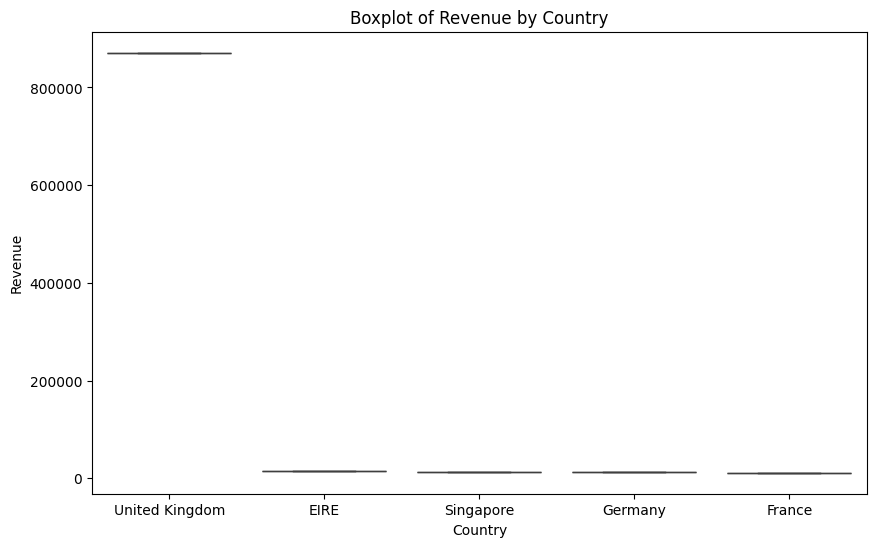

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=top_countries.index, y='Revenue', data=top_countries)

# Menambahkan label dan judul
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.title('Boxplot of Revenue by Country')

# Menampilkan plot
plt.show()

In [19]:
monthly_revenue = sales_df.resample(rule='M', on='InvoiceDate').agg({"InvoiceNo":"nunique","Quantity":"sum","UnitPrice":"sum"})
monthly_revenue['InvoiceDate'] = monthly_revenue.index.month
monthly_revenue_str = monthly_revenue.index.strftime('%B %Y')
monthly_revenue.rename(columns={"InvoiceNo": "InvoiceCount","UnitPrice": "Revenue"}, inplace=True)

<ipython-input-19-4d7c115f0c48>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = sales_df.resample(rule='M', on='InvoiceDate').agg({"InvoiceNo":"nunique","Quantity":"sum","UnitPrice":"sum"})


In [20]:
# Membuat dataframe baru
monthly_revenue.head(13)

,InvoiceCount,Quantity,Revenue,InvoiceDate
InvoiceDate,,,,
2010-12-31,2025,342228.0,260520.850,12
2011-01-31,1476,308966.0,172752.800,1
2011-02-28,1393,277989.0,127448.770,2
2011-03-31,1983,351872.0,171486.510,3
2011-04-30,1744,289098.0,129164.961,4
2011-05-31,1013,180488.0,96445.560,5


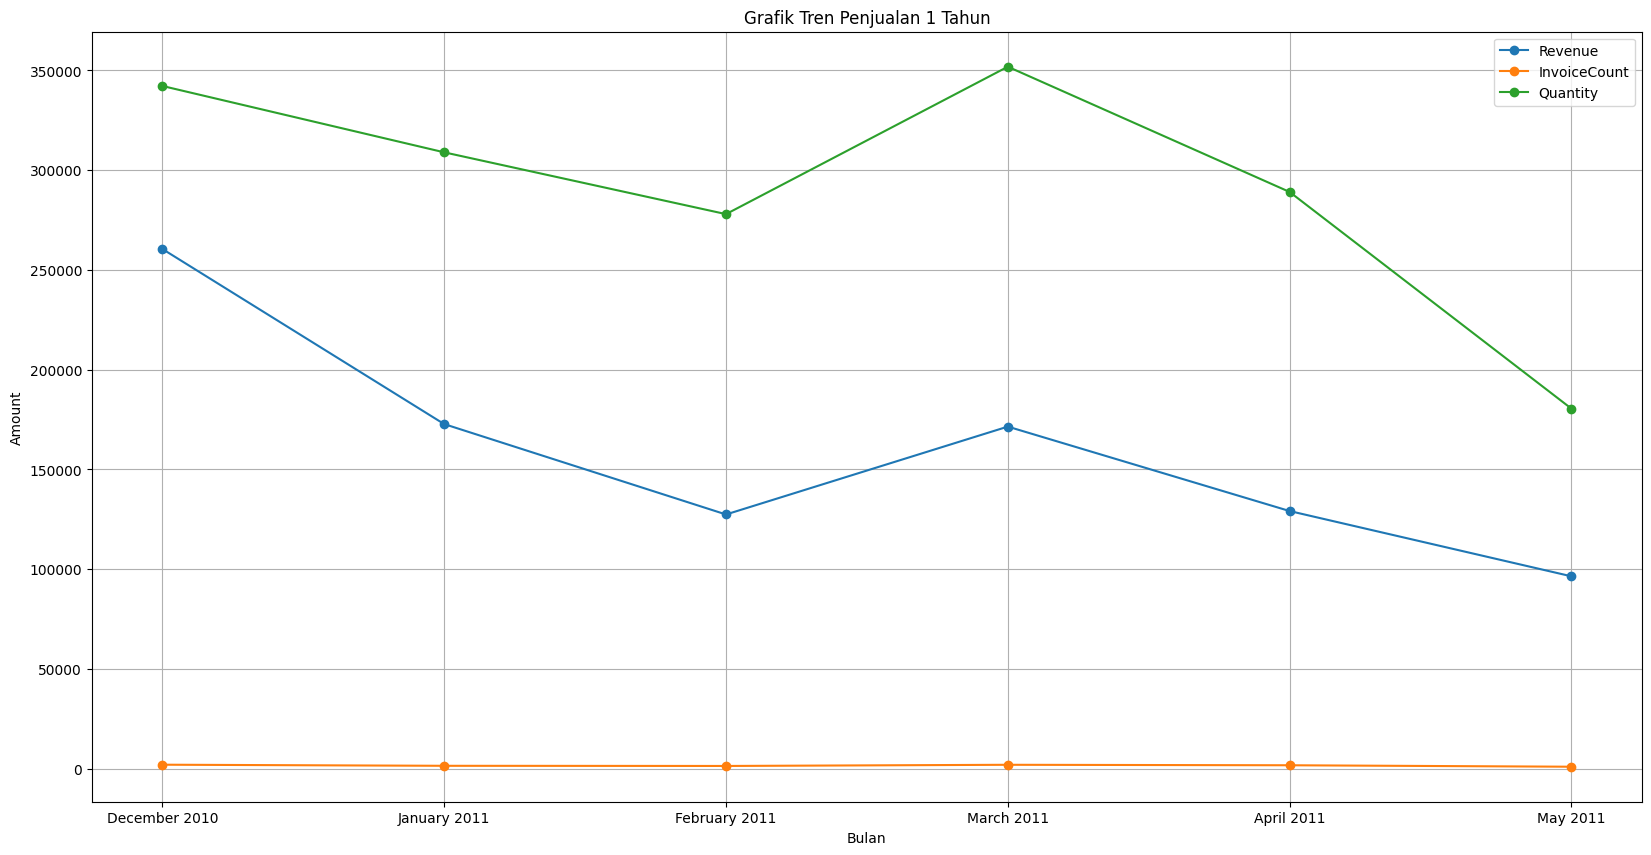

In [21]:
plt.figure(figsize=(20, 10))
plt.plot(monthly_revenue_str,monthly_revenue['Revenue'], label='Revenue', marker='o', linestyle='-')
plt.plot(monthly_revenue_str, monthly_revenue['InvoiceCount'], label="InvoiceCount", marker='o', linestyle='-')
plt.plot(monthly_revenue_str, monthly_revenue['Quantity'], label='Quantity', marker='o', linestyle='-')
plt.title('Grafik Tren Penjualan 1 Tahun')
plt.xlabel('Bulan')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()

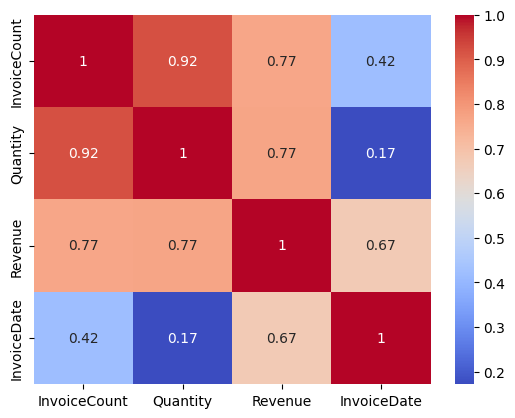

In [22]:
matriks_korelasi = monthly_revenue.corr()
sns.heatmap(matriks_korelasi, annot=True, cmap='coolwarm')
plt.show()

In [23]:
X = monthly_revenue[['InvoiceCount','Quantity']]
y = monthly_revenue['Revenue'].values

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)
hasil_train = model.score(X_train, y_train)
print('R-squarred hasil training : ', hasil_train)

R-squarred hasil training :  0.42405362949423153


In [26]:
hasil_testing = model.score(X_test, y_test)
print('R-squared hasil testing : ', hasil_testing)

R-squared hasil testing :  -14.240655461252707


In [27]:
future_dates = pd.date_range(monthly_revenue.index[-1] + pd.DateOffset(1), periods=12, freq='M')
future_dates_str = future_dates.strftime('%B %Y')
future_X = pd.DataFrame(index=future_dates, columns=['InvoiceCount', 'Quantity'])
future_X['InvoiceCount'] = [1476, 1393, 1983, 1744, 2162, 2012, 1927, 1737, 2327, 2637, 3462, 2025]
future_X['Quantity'] = [308966, 277989, 351872, 289098, 380391, 341623, 391116, 406199, 549817, 570532, 740286, 260520]
future_prediction = model.predict(future_X)

<ipython-input-27-8ad11e2b5b32>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(monthly_revenue.index[-1] + pd.DateOffset(1), periods=12, freq='M')


In [28]:
prediksi_penjualan = pd.DataFrame({
    'InvoiceDate': future_dates,
    'Prediksi_Revenue': future_prediction
})
print(prediksi_penjualan)

   InvoiceDate  Prediksi_Revenue
0   2011-06-30     160977.400510
1   2011-07-31     125408.367581
2   2011-08-31     218721.679720
3   2011-09-30     145110.929655
4   2011-10-31     253686.782055
5   2011-11-30     208174.353489
6   2011-12-31     260298.296371
7   2012-01-31     272634.460946
8   2012-02-29     441979.657469
9   2012-03-31     471268.982059
10  2012-04-30     674192.114186
11  2012-05-31     120029.096787


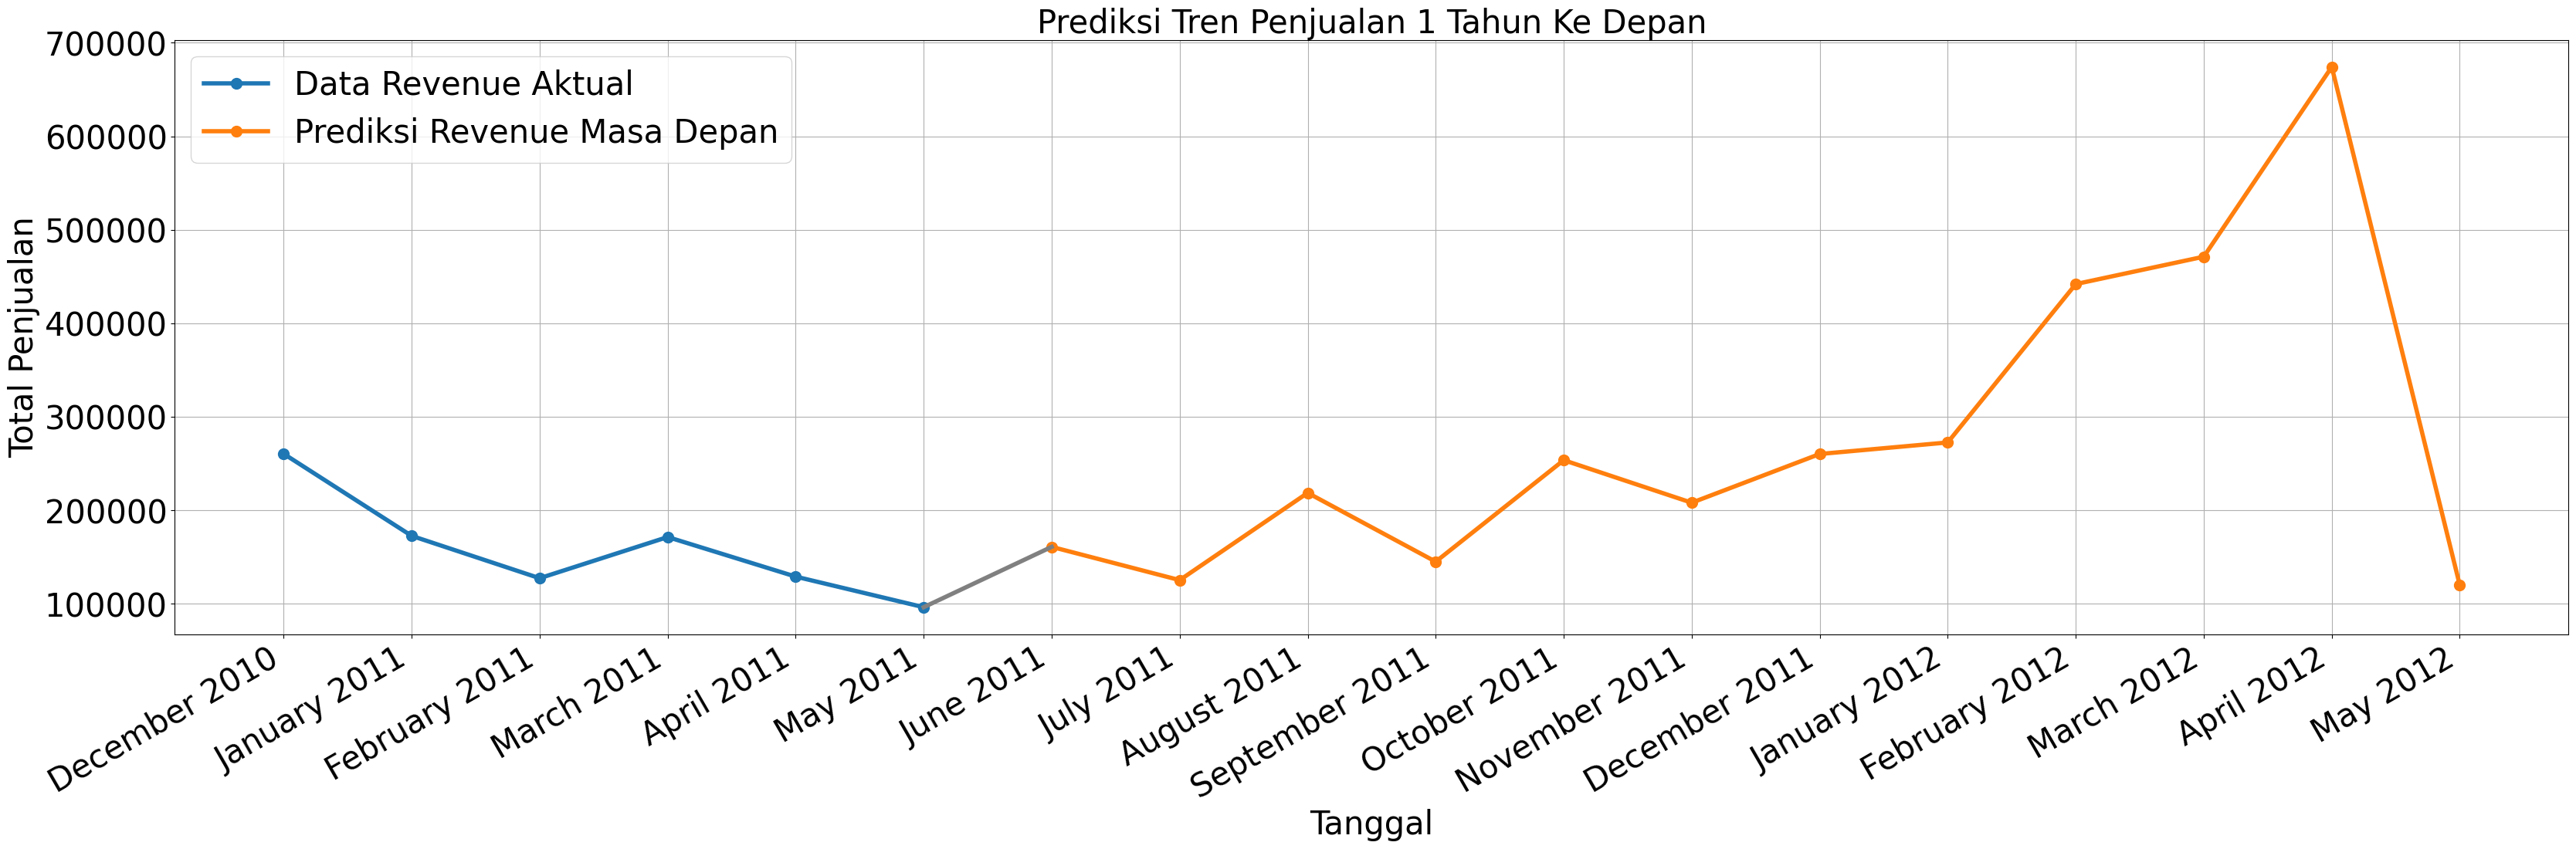

In [29]:
plt.figure(figsize=(40, 10))
plt.plot(monthly_revenue_str, monthly_revenue['Revenue'], marker='o', markersize=10, linestyle='-', linewidth=4, label='Data Revenue Aktual')
plt.plot(future_dates_str, future_prediction, marker='o', linestyle='-', markersize=10, linewidth=4, label='Prediksi Revenue Masa Depan')
plt.title('Prediksi Tren Penjualan 1 Tahun Ke Depan', fontsize=30)
plt.xlabel('Tanggal',fontsize=30)
plt.ylabel('Total Penjualan',fontsize=30)
plt.xticks(fontsize=30,rotation=30,ha='right')
plt.yticks(fontsize=30)
plt.legend(fontsize=30)
plt.grid(True)
last_actual_date_str = monthly_revenue_str[-1]
first_future_date_str = future_dates_str[0]
last_actual_revenue = monthly_revenue['Revenue'].iloc[-1]
future_prediction_series = pd.Series(future_prediction)
first_future_prediction = future_prediction_series.iloc[0]

plt.plot([last_actual_date_str, first_future_date_str], [last_actual_revenue, first_future_prediction], linestyle='-', linewidth=4, color='gray')
plt.show()